# Covid19 vaccination data 

##### Importing files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/home/Nithish1201/DataScience/DataScienceEnv/lib/python3.8/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


##### Importing data

In [2]:
data = pd.read_csv('../cowin_vaccine_data_districtwise.csv',low_memory=False)
data.head()

,S No,State_Code,State,District_Key,Cowin Key,District,16/01/2021,16/01/2021.1,16/01/2021.2,16/01/2021.3,...,18/07/2021,18/07/2021.1,18/07/2021.2,18/07/2021.3,18/07/2021.4,18/07/2021.5,18/07/2021.6,18/07/2021.7,18/07/2021.8,18/07/2021.9
0,NaN,NaN,NaN,NaN,NaN,NaN,Total Individuals Registered,Sessions,Sites,First Dose Administered,...,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Covaxin (Doses Administered),CoviShield (Doses Administered)
1,1.0,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobar,Nicobars,745,0,0,0,...,25840,0,0,18867,6973,13805,12034,1,0,25840
2,2.0,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,North and Middle Andaman,1496,0,0,0,...,77258,1131,10,51608,25650,40382,36866,10,0,77258
3,3.0,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,South Andaman,6028,2,2,23,...,155012,602,2,110330,44682,84104,70890,18,0,155012
4,4.0,AP,Andhra Pradesh,AP_Anantapur,Anantapur,Anantapur,20781,28,26,287,...,1385730,300,1,1037726,348004,626187,758919,624,184132,1201598


In [3]:
data.shape

(755, 1846)

In [4]:
data.columns

Index(['S No', 'State_Code', 'State', 'District_Key', 'Cowin Key', 'District',
       '16/01/2021', '16/01/2021.1', '16/01/2021.2', '16/01/2021.3',
       ...
       '18/07/2021', '18/07/2021.1', '18/07/2021.2', '18/07/2021.3',
       '18/07/2021.4', '18/07/2021.5', '18/07/2021.6', '18/07/2021.7',
       '18/07/2021.8', '18/07/2021.9'],
      dtype='object', length=1846)

In [5]:
data.describe()

,S No
count,754.000000
mean,377.529178
std,217.854496
min,1.000000
25%,189.250000
50%,377.500000
75%,565.750000
max,755.000000


- There is no description for any column though there are a lot of numerical problems
- Which indicates the data types are not properly given to the data

## Seperating the main data into two dataframes 
    [Strings and numerical]

### Data1

In [6]:
data1 = pd.DataFrame(data,columns=['State','State_Code','District','District_Key'])
data1

,State,State_Code,District,District_Key
0,NaN,NaN,NaN,NaN
1,Andaman and Nicobar Islands,AN,Nicobars,AN_Nicobars
2,Andaman and Nicobar Islands,AN,North and Middle Andaman,AN_North and Middle Andaman
3,Andaman and Nicobar Islands,AN,South Andaman,AN_South Andaman
4,Andhra Pradesh,AP,Anantapur,AP_Anantapur
...,...,...,...,...
750,West Bengal,WB,Purulia,WB_Purulia
751,West Bengal,WB,Birbhum,WB_Birbhum
752,West Bengal,WB,South 24 Parganas,WB_South 24 Parganas
753,West Bengal,WB,Uttar Dinajpur,WB_Uttar Dinajpur


In [7]:
data1.dtypes

State           object
State_Code      object
District        object
District_Key    object
dtype: object

- we're clear that the data types areto be changed

##### Dropping NaN row -> row[0]

In [8]:
data1.drop(0,axis=0,inplace=True)

In [9]:
data1

,State,State_Code,District,District_Key
1,Andaman and Nicobar Islands,AN,Nicobars,AN_Nicobars
2,Andaman and Nicobar Islands,AN,North and Middle Andaman,AN_North and Middle Andaman
3,Andaman and Nicobar Islands,AN,South Andaman,AN_South Andaman
4,Andhra Pradesh,AP,Anantapur,AP_Anantapur
5,Andhra Pradesh,AP,Chittoor,AP_Chittoor
...,...,...,...,...
750,West Bengal,WB,Purulia,WB_Purulia
751,West Bengal,WB,Birbhum,WB_Birbhum
752,West Bengal,WB,South 24 Parganas,WB_South 24 Parganas
753,West Bengal,WB,Uttar Dinajpur,WB_Uttar Dinajpur


##### Reindexing

In [10]:
data1.reset_index(inplace=True)
data1.drop('index',axis=1,inplace=True)
data1

,State,State_Code,District,District_Key
0,Andaman and Nicobar Islands,AN,Nicobars,AN_Nicobars
1,Andaman and Nicobar Islands,AN,North and Middle Andaman,AN_North and Middle Andaman
2,Andaman and Nicobar Islands,AN,South Andaman,AN_South Andaman
3,Andhra Pradesh,AP,Anantapur,AP_Anantapur
4,Andhra Pradesh,AP,Chittoor,AP_Chittoor
...,...,...,...,...
749,West Bengal,WB,Purulia,WB_Purulia
750,West Bengal,WB,Birbhum,WB_Birbhum
751,West Bengal,WB,South 24 Parganas,WB_South 24 Parganas
752,West Bengal,WB,Uttar Dinajpur,WB_Uttar Dinajpur


#### Checking for NaN values in each column

In [11]:
data1.isna().any()

State           False
State_Code      False
District        False
District_Key    False
dtype: bool

##### changing the datatypes of columns to string

In [12]:
data1 = data1.astype('string')

In [13]:
data1.dtypes

State           string
State_Code      string
District        string
District_Key    string
dtype: object

checking the changed data type with some string operations

In [14]:
data1.State[0]

'Andaman and Nicobar Islands'

In [15]:
data1.State[0].split(' ')

['Andaman', 'and', 'Nicobar', 'Islands']

### Data2

As we need only certain columns from the main table, we are going to create a lists of columns to extract from the main data base

##### creating column list

In [16]:
cols = pd.date_range('16/01/2021',periods=(30*6)+2)
cols

DatetimeIndex(['2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
               '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
               '2021-01-24', '2021-01-25',
               ...
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-10',
               '2021-07-11', '2021-07-12', '2021-07-13', '2021-07-14',
               '2021-07-15', '2021-07-16'],
              dtype='datetime64[ns]', length=182, freq='D')

In [17]:
cols_df = pd.DataFrame(cols,columns=['dates'])
cols_df

,dates
0,2021-01-16
1,2021-01-17
2,2021-01-18
3,2021-01-19
4,2021-01-20
...,...
177,2021-07-12
178,2021-07-13
179,2021-07-14
180,2021-07-15


#### changing the #date format# of list as in table

In [18]:
columns = cols_df['dates'].dt.strftime('%d/%m/20%y').tolist()

In [19]:
len(columns)

182

In [20]:
columns[:9]

['16/01/2021',
 '17/01/2021',
 '18/01/2021',
 '19/01/2021',
 '20/01/2021',
 '21/01/2021',
 '22/01/2021',
 '23/01/2021',
 '24/01/2021']

##### Creating data2 for numerical data by applying column list

In [21]:
data2 = pd.DataFrame(data,columns=columns)
data2

,16/01/2021,17/01/2021,18/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,23/01/2021,24/01/2021,25/01/2021,...,07/07/2021,08/07/2021,09/07/2021,10/07/2021,11/07/2021,12/07/2021,13/07/2021,14/07/2021,15/07/2021,16/07/2021
0,Total Individuals Registered,Total Individuals Registered,Total Individuals Registered,Total Individuals Registered,Total Individuals Registered,Total Individuals Registered,Total Individuals Registered,Total Individuals Registered,Total Individuals Registered,Total Individuals Registered,...,Total Doses Administered,Total Doses Administered,Total Doses Administered,Total Doses Administered,Total Doses Administered,Total Doses Administered,Total Doses Administered,Total Doses Administered,Total Doses Administered,Total Doses Administered
1,745,745,745,745,745,746,746,809,828,923,...,20883,21267,21732,21965,21965,22334,22626,24077,24859,25484
2,1496,1496,1496,1496,1496,1597,1758,1793,1793,1831,...,57858,59774,62709,66100,66178,69649,71991,74667,75737,76602
3,6028,6028,5719,5986,6125,6207,7193,8092,9777,10297,...,124124,127553,131284,134518,134916,138467,142028,147925,150551,152728
4,20781,20781,20745,21005,21301,21859,22488,22766,22796,25439,...,1198654,1199262,1204195,1206672,1256352,1268019,1269471,1337273,1345738,1367837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
750,18395,18395,18452,18488,18575,19086,20093,20428,21172,22063,...,519163,521431,527068,529286,529595,532058,533229,543454,546214,551558
751,4685,4703,4666,4765,4915,4945,5101,5165,5193,5388,...,341230,342807,347519,349598,350137,356431,358991,371203,374021,382300
752,24722,24722,24585,24762,24814,24843,25926,27324,28455,30811,...,1201053,1208379,1227472,1236878,1242332,1253886,1264382,1276196,1286021,1303092
753,NaN,18051,12945,13301,14003,14645,15293,15423,15439,15963,...,474156,477174,483239,486197,486236,492777,500306,508119,513982,527537


##### Dropping NaN row -> row[0]

In [22]:
data2.drop(0,axis=0,inplace=True)

In [23]:
data2.head()

,16/01/2021,17/01/2021,18/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,23/01/2021,24/01/2021,25/01/2021,...,07/07/2021,08/07/2021,09/07/2021,10/07/2021,11/07/2021,12/07/2021,13/07/2021,14/07/2021,15/07/2021,16/07/2021
1,745,745,745,745,745,746,746,809,828,923,...,20883,21267,21732,21965,21965,22334,22626,24077,24859,25484
2,1496,1496,1496,1496,1496,1597,1758,1793,1793,1831,...,57858,59774,62709,66100,66178,69649,71991,74667,75737,76602
3,6028,6028,5719,5986,6125,6207,7193,8092,9777,10297,...,124124,127553,131284,134518,134916,138467,142028,147925,150551,152728
4,20781,20781,20745,21005,21301,21859,22488,22766,22796,25439,...,1198654,1199262,1204195,1206672,1256352,1268019,1269471,1337273,1345738,1367837
5,26285,26294,24319,25642,26873,28306,30695,32585,32953,33952,...,1388889,1391326,1394148,1396208,1396383,1437319,1452212,1482003,1485603,1498998


##### Resetting index

In [24]:
data2.reset_index(inplace=True)

In [25]:
data2.head()

,index,16/01/2021,17/01/2021,18/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,23/01/2021,24/01/2021,...,07/07/2021,08/07/2021,09/07/2021,10/07/2021,11/07/2021,12/07/2021,13/07/2021,14/07/2021,15/07/2021,16/07/2021
0,1,745,745,745,745,745,746,746,809,828,...,20883,21267,21732,21965,21965,22334,22626,24077,24859,25484
1,2,1496,1496,1496,1496,1496,1597,1758,1793,1793,...,57858,59774,62709,66100,66178,69649,71991,74667,75737,76602
2,3,6028,6028,5719,5986,6125,6207,7193,8092,9777,...,124124,127553,131284,134518,134916,138467,142028,147925,150551,152728
3,4,20781,20781,20745,21005,21301,21859,22488,22766,22796,...,1198654,1199262,1204195,1206672,1256352,1268019,1269471,1337273,1345738,1367837
4,5,26285,26294,24319,25642,26873,28306,30695,32585,32953,...,1388889,1391326,1394148,1396208,1396383,1437319,1452212,1482003,1485603,1498998


In [26]:
data2.drop('index',axis=1,inplace=True)

In [27]:
data2

,16/01/2021,17/01/2021,18/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,23/01/2021,24/01/2021,25/01/2021,...,07/07/2021,08/07/2021,09/07/2021,10/07/2021,11/07/2021,12/07/2021,13/07/2021,14/07/2021,15/07/2021,16/07/2021
0,745,745,745,745,745,746,746,809,828,923,...,20883,21267,21732,21965,21965,22334,22626,24077,24859,25484
1,1496,1496,1496,1496,1496,1597,1758,1793,1793,1831,...,57858,59774,62709,66100,66178,69649,71991,74667,75737,76602
2,6028,6028,5719,5986,6125,6207,7193,8092,9777,10297,...,124124,127553,131284,134518,134916,138467,142028,147925,150551,152728
3,20781,20781,20745,21005,21301,21859,22488,22766,22796,25439,...,1198654,1199262,1204195,1206672,1256352,1268019,1269471,1337273,1345738,1367837
4,26285,26294,24319,25642,26873,28306,30695,32585,32953,33952,...,1388889,1391326,1394148,1396208,1396383,1437319,1452212,1482003,1485603,1498998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,18395,18395,18452,18488,18575,19086,20093,20428,21172,22063,...,519163,521431,527068,529286,529595,532058,533229,543454,546214,551558
750,4685,4703,4666,4765,4915,4945,5101,5165,5193,5388,...,341230,342807,347519,349598,350137,356431,358991,371203,374021,382300
751,24722,24722,24585,24762,24814,24843,25926,27324,28455,30811,...,1201053,1208379,1227472,1236878,1242332,1253886,1264382,1276196,1286021,1303092
752,NaN,18051,12945,13301,14003,14645,15293,15423,15439,15963,...,474156,477174,483239,486197,486236,492777,500306,508119,513982,527537


### check for NaN values in every column

In [28]:
data2.isna().any()

16/01/2021     True
17/01/2021    False
18/01/2021     True
19/01/2021     True
20/01/2021     True
              ...  
12/07/2021    False
13/07/2021    False
14/07/2021    False
15/07/2021    False
16/07/2021    False
Length: 182, dtype: bool

#### function that returns a list of all column names which has NaN values

In [29]:
def nan_list(data_set):
    nan_col = []
    for i,v in enumerate(data_set.columns):
        if data_set.isna().any()[i] == True:
            nan_col.append(v)
    return nan_col

In [30]:
data2_nan = nan_list(data2)

In [31]:
data2_nan

['16/01/2021',
 '18/01/2021',
 '19/01/2021',
 '20/01/2021',
 '21/01/2021',
 '22/01/2021',
 '23/01/2021',
 '24/01/2021',
 '25/01/2021',
 '26/01/2021',
 '27/01/2021',
 '28/01/2021',
 '29/01/2021',
 '30/01/2021',
 '31/01/2021',
 '01/02/2021',
 '02/02/2021',
 '03/02/2021',
 '04/02/2021',
 '05/02/2021',
 '06/02/2021',
 '07/02/2021',
 '08/02/2021',
 '09/02/2021',
 '10/02/2021',
 '11/02/2021',
 '12/02/2021',
 '13/02/2021',
 '14/02/2021',
 '15/02/2021',
 '16/02/2021',
 '17/02/2021']

In [32]:
len(data2_nan)

32

##### Our numerical data (data2) has 32 columns with NaN

##### Attempting to fill NaN values with forward fill method

In [33]:
for i in range(len(data2_nan)):
    data2[data2_nan[i]].fillna(method='ffill',inplace=True)

In [34]:
val = nan_list(data2)

##### No null values now

In [35]:
val

[]

In [36]:
data2.isna().any()

16/01/2021    False
17/01/2021    False
18/01/2021    False
19/01/2021    False
20/01/2021    False
              ...  
12/07/2021    False
13/07/2021    False
14/07/2021    False
15/07/2021    False
16/07/2021    False
Length: 182, dtype: bool

#### changing datatype to int

In [37]:
data2 = data2.astype(int)

In [38]:
data2.dtypes

16/01/2021    int64
17/01/2021    int64
18/01/2021    int64
19/01/2021    int64
20/01/2021    int64
              ...  
12/07/2021    int64
13/07/2021    int64
14/07/2021    int64
15/07/2021    int64
16/07/2021    int64
Length: 182, dtype: object

#### Performing integer operation to confirm

In [39]:
data2['16/01/2021'].mean()

9572.802387267904

In [40]:
data1.shape

(754, 4)

In [41]:
data2.shape

(754, 182)

### Concatenating two data frames

In [42]:
dataset = pd.concat([data1,data2],axis=1)
dataset

,State,State_Code,District,District_Key,16/01/2021,17/01/2021,18/01/2021,19/01/2021,20/01/2021,21/01/2021,...,07/07/2021,08/07/2021,09/07/2021,10/07/2021,11/07/2021,12/07/2021,13/07/2021,14/07/2021,15/07/2021,16/07/2021
0,Andaman and Nicobar Islands,AN,Nicobars,AN_Nicobars,745,745,745,745,745,746,...,20883,21267,21732,21965,21965,22334,22626,24077,24859,25484
1,Andaman and Nicobar Islands,AN,North and Middle Andaman,AN_North and Middle Andaman,1496,1496,1496,1496,1496,1597,...,57858,59774,62709,66100,66178,69649,71991,74667,75737,76602
2,Andaman and Nicobar Islands,AN,South Andaman,AN_South Andaman,6028,6028,5719,5986,6125,6207,...,124124,127553,131284,134518,134916,138467,142028,147925,150551,152728
3,Andhra Pradesh,AP,Anantapur,AP_Anantapur,20781,20781,20745,21005,21301,21859,...,1198654,1199262,1204195,1206672,1256352,1268019,1269471,1337273,1345738,1367837
4,Andhra Pradesh,AP,Chittoor,AP_Chittoor,26285,26294,24319,25642,26873,28306,...,1388889,1391326,1394148,1396208,1396383,1437319,1452212,1482003,1485603,1498998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,West Bengal,WB,Purulia,WB_Purulia,18395,18395,18452,18488,18575,19086,...,519163,521431,527068,529286,529595,532058,533229,543454,546214,551558
750,West Bengal,WB,Birbhum,WB_Birbhum,4685,4703,4666,4765,4915,4945,...,341230,342807,347519,349598,350137,356431,358991,371203,374021,382300
751,West Bengal,WB,South 24 Parganas,WB_South 24 Parganas,24722,24722,24585,24762,24814,24843,...,1201053,1208379,1227472,1236878,1242332,1253886,1264382,1276196,1286021,1303092
752,West Bengal,WB,Uttar Dinajpur,WB_Uttar Dinajpur,24722,18051,12945,13301,14003,14645,...,474156,477174,483239,486197,486236,492777,500306,508119,513982,527537


In [43]:
dataset.shape

(754, 186)

In [44]:
dataset.columns

Index(['State', 'State_Code', 'District', 'District_Key', '16/01/2021',
       '17/01/2021', '18/01/2021', '19/01/2021', '20/01/2021', '21/01/2021',
       ...
       '07/07/2021', '08/07/2021', '09/07/2021', '10/07/2021', '11/07/2021',
       '12/07/2021', '13/07/2021', '14/07/2021', '15/07/2021', '16/07/2021'],
      dtype='object', length=186)

##### Description of Numerical data

In [45]:
dataset.describe()

,16/01/2021,17/01/2021,18/01/2021,19/01/2021,20/01/2021,21/01/2021,22/01/2021,23/01/2021,24/01/2021,25/01/2021,...,07/07/2021,08/07/2021,09/07/2021,10/07/2021,11/07/2021,12/07/2021,13/07/2021,14/07/2021,15/07/2021,16/07/2021
count,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,754.000000,...,7.540000e+02,7.540000e+02,7.540000e+02,7.540000e+02,7.540000e+02,7.540000e+02,7.540000e+02,7.540000e+02,7.540000e+02,7.540000e+02
mean,9572.802387,9650.802387,9540.450928,9875.622016,10033.570292,10268.350133,10665.358090,11002.774536,11171.364721,11647.966844,...,4.770932e+05,4.825811e+05,4.868422e+05,4.919382e+05,4.937000e+05,4.991387e+05,5.042608e+05,5.123185e+05,5.176219e+05,5.233975e+05
std,13807.962483,13829.365456,13522.479352,14131.076013,14370.276371,14626.581839,15046.901862,15411.732550,15523.498099,16091.418463,...,5.417375e+05,5.461373e+05,5.508470e+05,5.573719e+05,5.596451e+05,5.652571e+05,5.704012e+05,5.791717e+05,5.842509e+05,5.913229e+05
min,134.000000,134.000000,133.000000,136.000000,136.000000,179.000000,258.000000,258.000000,258.000000,263.000000,...,4.232000e+03,4.242000e+03,4.295000e+03,4.295000e+03,4.295000e+03,4.295000e+03,4.497000e+03,4.501000e+03,4.518000e+03,4.521000e+03
25%,3441.750000,3438.750000,3457.250000,3610.500000,3782.500000,3850.250000,4147.750000,4263.000000,4348.000000,4523.500000,...,1.863370e+05,1.889320e+05,1.909682e+05,1.935362e+05,1.954145e+05,1.998448e+05,2.022648e+05,2.048758e+05,2.081230e+05,2.112522e+05
50%,6226.000000,6227.500000,6227.500000,6479.000000,6599.500000,6767.000000,7065.000000,7250.500000,7402.500000,7665.500000,...,3.418690e+05,3.456165e+05,3.486575e+05,3.530930e+05,3.546750e+05,3.567790e+05,3.604955e+05,3.681880e+05,3.723495e+05,3.748745e+05
75%,10985.500000,11080.000000,11103.000000,11477.750000,11631.750000,11830.500000,12348.000000,12548.500000,12662.000000,13084.250000,...,5.992050e+05,6.061558e+05,6.123565e+05,6.128538e+05,6.235765e+05,6.317025e+05,6.327658e+05,6.467030e+05,6.518725e+05,6.591745e+05
max,215157.000000,215940.000000,211451.000000,226148.000000,228819.000000,232235.000000,236744.000000,240379.000000,240995.000000,246165.000000,...,6.052600e+06,6.091132e+06,6.132140e+06,6.184024e+06,6.210591e+06,6.291668e+06,6.343059e+06,6.436487e+06,6.504553e+06,6.590565e+06


##### Description of String data

In [46]:
dataset.iloc[:,:4].describe()

,State,State_Code,District,District_Key
count,754,754,754,754
unique,36,36,724,729
top,Uttar Pradesh,UP,Aurangabad,WB_Bankura
freq,75,75,2,2


In [97]:
State_Data = dataset.groupby('State_Code').sum().T

In [101]:
State_Data

State_Code,AN,AP,AR,AS,BR,CH,CT,DL,DN,GA,...,PB,PY,RJ,SK,TG,TN,TR,UP,UT,WB
16/01/2021,8269,277023,42660,236847,311282,17849,187856,256878,2117,16349,...,146109,13197,371438,16094,229490,262770,28896,806592,87193,694584
17/01/2021,8269,277071,42469,238049,309230,17856,189047,258560,2119,16368,...,147202,13205,372195,16490,230858,262083,28899,848442,87546,689567
18/01/2021,7960,272214,40192,234832,309572,16317,188790,248755,2119,15595,...,140762,11410,371382,17105,231406,243908,31113,819394,89234,682843
19/01/2021,8227,280631,46961,241236,316492,17411,194571,259118,2328,16266,...,145594,12692,377395,18095,245019,257185,38013,847308,90819,700887
20/01/2021,8366,288452,47064,242805,317356,17451,197392,263673,2546,16317,...,146706,12717,379578,18528,249397,260013,39677,861276,91707,710658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/07/2021,230450,17357400,717072,8264288,18943852,620721,9371010,8937940,537625,1113775,...,7618925,610205,26449059,570245,12589998,17843953,2733684,37697118,4931083,24356550
13/07/2021,236645,17589477,726070,8346086,19094504,628577,9381749,9067022,545506,1127686,...,7664312,615861,26864455,572209,12746415,18181398,2755529,38345389,4960171,24586285
14/07/2021,246669,18040090,736247,8474492,19302470,646643,9630813,9153718,556914,1144976,...,7797266,628690,27443343,576624,12840921,18548239,2782404,38837428,5024419,25034355
15/07/2021,251147,18130140,746764,8543611,19783157,655179,9676220,9186905,563640,1155882,...,7822491,633987,27500600,586083,12962575,18730668,2808453,39516462,5092396,25273258


In [166]:
State_Data.columns

Index(['AN', 'AP', 'AR', 'AS', 'BR', 'CH', 'CT', 'DL', 'DN', 'GA', 'GJ', 'HP',
       'HR', 'JH', 'JK', 'KA', 'KL', 'LA', 'LD', 'MH', 'ML', 'MN', 'MP', 'MZ',
       'NL', 'OR', 'PB', 'PY', 'RJ', 'SK', 'TG', 'TN', 'TR', 'UP', 'UT', 'WB'],
      dtype='object', name='State_Code')

In [167]:
State_Data.corr()

State_Code,AN,AP,AR,AS,BR,CH,CT,DL,DN,GA,...,PB,PY,RJ,SK,TG,TN,TR,UP,UT,WB
State_Code,,,,,,,,,,,,,,,,,,,,,
AN,1.000000,0.969738,0.966783,0.965791,0.982630,0.972516,0.969169,0.982661,0.945894,0.974040,...,0.991897,0.971179,0.977010,0.964954,0.980208,0.961718,0.961170,0.973712,0.984418,0.971607
AP,0.969738,1.000000,0.993353,0.994890,0.994713,0.995850,0.943236,0.992774,0.987611,0.996849,...,0.981639,0.994909,0.982634,0.988060,0.995714,0.997896,0.987210,0.998085,0.993345,0.995285
AR,0.966783,0.993353,1.000000,0.997190,0.986888,0.995362,0.920015,0.989107,0.994068,0.997734,...,0.970625,0.995644,0.964267,0.992112,0.993818,0.994530,0.979069,0.994190,0.985022,0.983610
AS,0.965791,0.994890,0.997190,1.000000,0.990413,0.996896,0.928627,0.993144,0.989569,0.997642,...,0.975436,0.993575,0.971892,0.988714,0.992676,0.995539,0.985253,0.994731,0.989175,0.987141
BR,0.982630,0.994713,0.986888,0.990413,1.000000,0.993698,0.963834,0.996470,0.975595,0.994356,...,0.993750,0.990804,0.993034,0.983322,0.994479,0.990687,0.986861,0.996424,0.998805,0.995019
CH,0.972516,0.995850,0.995362,0.996896,0.993698,1.000000,0.933352,0.994905,0.987952,0.998697,...,0.982293,0.992476,0.977137,0.982792,0.994006,0.994156,0.978193,0.995748,0.990901,0.988793
CT,0.969169,0.943236,0.920015,0.928627,0.963834,0.933352,1.000000,0.957976,0.896173,0.935407,...,0.977757,0.936423,0.982869,0.936659,0.946745,0.934508,0.959569,0.947544,0.970433,0.964157
DL,0.982661,0.992774,0.989107,0.993144,0.996470,0.994905,0.957976,1.000000,0.977533,0.994427,...,0.991484,0.988348,0.986125,0.982407,0.993211,0.988854,0.984015,0.993683,0.997250,0.990556
DN,0.945894,0.987611,0.994068,0.989569,0.975595,0.987952,0.896173,0.977533,1.000000,0.990558,...,0.951763,0.988135,0.947909,0.984637,0.982009,0.990633,0.967019,0.988621,0.971758,0.974702


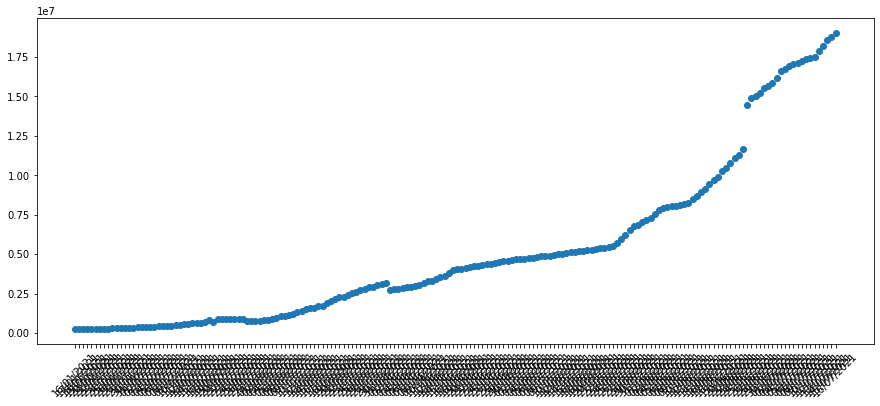

In [165]:
plt.figure(figsize=(15,6))
plt.plot(State_Data['TN'],'o')
#plt.ticklabel_format(useOffset=False)
plt.xticks(rotation = 45)
plt.show()

In [106]:
num_val = np.array([State_Data.iloc[:,i] for i in range(State_Data.shape[1])])

In [107]:
num_val

array([[    8269,     8269,     7960, ...,   246669,   251147,   254814],
       [  277023,   277071,   272214, ..., 18040090, 18130140, 18391785],
       [   42660,    42469,    40192, ...,   736247,   746764,   756314],
       ...,
       [  806592,   848442,   819394, ..., 38837428, 39516462, 39934673],
       [   87193,    87546,    89234, ...,  5024419,  5092396,  5145220],
       [  694584,   689567,   682843, ..., 25034355, 25273258, 25609415]])

In [108]:
num_val.shape

(36, 182)

In [113]:
num_val = num_val.flatten()

In [129]:
num_val

array([    8269,     8269,     7960, ..., 25034355, 25273258, 25609415])

In [130]:
num_val.min()

742

In [132]:
num_val.max()

39934673

In [117]:
num_val.shape

(6552,)

In [119]:
np.ones(len(num_val)).shape

(6552,)

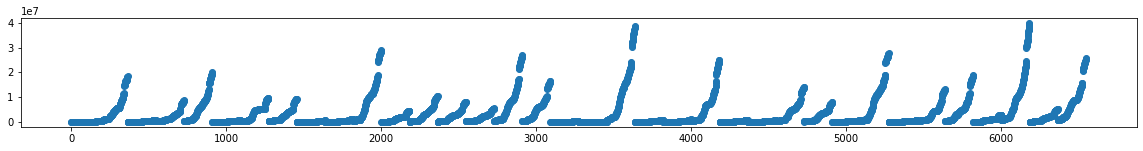

In [135]:
plt.figure(figsize=(20,2))
plt.plot(num_val,'o')
plt.show()